In [2]:
import json

In [ ]:
City = [dataset_venues[venue] for venue in final_df['venue']]

In [ ]:
final_df['city'] = City

In [ ]:
final_df['city'].unique()

array(['Bengaluru', 'Mohali', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Ahmedabad', 'Cuttack', 'Nagpur',
       'Dharamsala', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', 'Sharjah', 'Dubai', 'Indore'], dtype=object)

In [ ]:
final_df = final_df[['batting_team','bowling_team','city','runs_to_bat','balls_left','wickets_left','target','crr','rrr','result']]

In [3]:
fixtures = json.loads(open('fixtures.json').read())

In [4]:
fixtures

{'results': [{'id': 2718963,
   'series_id': 1430,
   'venue': 'Narendra Modi Stadium, Ahmedabad (night)',
   'date': '2023-03-31T14:00:00+00:00',
   'status': 'Complete',
   'result': 'Titans won by 5 wkts (4b rem)',
   'match_title': 'Gujarat Titans v Chennai Super Kings at Narendra Modi Stadium, Ahmedabad (night), T20.',
   'match_subtitle': '1st Match',
   'home': {'id': 161268, 'name': 'Gujarat Titans', 'code': ''},
   'away': {'id': 101742, 'name': 'Chennai Super Kings', 'code': 'CSK'}},
  {'id': 2718965,
   'series_id': 1430,
   'venue': 'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh (day/night)',
   'date': '2023-04-01T10:00:00+00:00',
   'status': 'Complete',
   'result': 'Punjab Kings won by 7 runs (DLS)',
   'match_title': 'Punjab Kings v Kolkata Knight Riders at Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh (day/night), T20.',
   'match_subtitle': '2nd Match',
   'home': {'id': 145221, 'name': 'Punjab Kings', 'code': ''},
   'away': {'i

In [ ]:
sorted(final_df['venue'].unique())

['Arun Jaitley Cricket Stadium',
 'Barabati Stadium',
 'Brabourne Stadium',
 'Buffalo Park',
 'De Beers Diamond Oval',
 'Dr DY Patil Sports Academy',
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
 'Dubai International Cricket Stadium',
 'Eden Gardens',
 'Himachal Pradesh Cricket Association Stadium',
 'Holkar Cricket Stadium',
 'JSCA International Stadium Complex',
 'Kingsmead',
 'M Chinnaswamy Stadium',
 'MA Chidambaram Stadium, Chepauk',
 'Maharashtra Cricket Association Stadium',
 'New Wanderers Stadium',
 'Newlands',
 'OUTsurance Oval',
 'Punjab Cricket Association Stadium, Mohali',
 'Rajiv Gandhi International Stadium, Uppal',
 'Sardar Patel Stadium, Motera',
 'Sawai Mansingh Stadium',
 'Shaheed Veer Narayan Singh International Stadium',
 'Sharjah Cricket Stadium',
 'Sheikh Zayed Stadium',
 "St George's Park",
 'SuperSport Park',
 'Vidarbha Cricket Association Stadium, Jamtha',
 'Wankhede Stadium']

In [ ]:
import pickle
pipe = pickle.load(open('model.pkl', 'rb'))

In [ ]:
pipe

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [ ]:
pipe.steps

[('step1',
  ColumnTransformer(remainder='passthrough',
                    transformers=[('trf',
                                   OneHotEncoder(drop='first', sparse=False),
                                   ['batting_team', 'bowling_team', 'city'])])),
 ('step2', LogisticRegression(solver='liblinear'))]

In [ ]:
print(pipe.named_steps['step2'].coef_.shape)
pipe.named_steps['step2'].coef_

(1, 39)


array([[-3.59649641e+00, -4.57844069e-01, -6.10560258e-01,
         1.26248492e-01, -1.64315597e-01, -8.03051599e-01,
        -1.67596032e+00,  6.89616775e-01,  2.82260274e-01,
        -1.90255054e-01, -3.81702556e-01,  2.51456124e-01,
         6.62740776e-01,  2.72785557e-01, -3.64147931e-01,
         4.26089959e-01, -7.84707623e-01,  9.16264834e-02,
        -9.14716144e-02, -5.29556689e-01, -5.12263624e-01,
         2.13459827e-01,  1.94999894e+00,  7.05875432e-01,
         7.72725277e-01, -1.90881079e-02,  2.34888828e-02,
        -4.03644726e+00,  1.48719084e-01, -1.35860973e+00,
         1.41341067e+00,  6.64737068e-01,  9.69575276e-01,
        -2.97826427e-02,  1.68669020e-03,  7.71824780e-01,
        -1.59896547e-02, -5.42725549e-04, -9.54275946e-04]])

In [ ]:
pipe.feature_names_in_

array(['batting_team', 'bowling_team', 'city', 'runs_to_bat',
       'balls_left', 'wickets_left', 'target', 'crr', 'rrr'], dtype=object)

In [ ]:
pipe.named_steps['step1']

ColumnTransformer(remainder='passthrough',
                  transformers=[('trf',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['batting_team', 'bowling_team', 'city'])])

In [ ]:
input_df = pd.DataFrame({
            'batting_team': ['Chennai Super Kings'],
            'bowling_team': ['Mumbai Indians'],
            'venue': ['Wankhede Stadium'],
            'runs_to_bat': [30],
            'balls_left': [18],
            'wickets_left': [4],
            'target': [180],
            'crr': [150/17],
            'rrr': [30/3]
        })

In [ ]:
pipe.predict_proba(input_df)

array([[0.69651172, 0.30348828]])

In [ ]:
sorted(final_df['batting_team'].unique())

['Chennai Super Kings',
 'Delhi Capitals',
 'Kings XI Punjab',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Rajasthan Royals',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad']

In [ ]:
teams = ['Arun Jaitley Cricket Stadium',
 'Barabati Stadium',
 'Brabourne Stadium',
 'Buffalo Park',
 'De Beers Diamond Oval',
 'Dr DY Patil Sports Academy',
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
 'Dubai International Cricket Stadium',
 'Eden Gardens',
 'Himachal Pradesh Cricket Association Stadium',
 'Holkar Cricket Stadium',
 'JSCA International Stadium Complex',
 'Kingsmead',
 'M Chinnaswamy Stadium',
 'MA Chidambaram Stadium, Chepauk',
 'Maharashtra Cricket Association Stadium',
 'New Wanderers Stadium',
 'Newlands',
 'OUTsurance Oval',
 'Punjab Cricket Association Stadium, Mohali',
 'Rajiv Gandhi International Stadium, Uppal',
 'Sardar Patel Stadium, Motera',
 'Sawai Mansingh Stadium',
 'Shaheed Veer Narayan Singh International Stadium',
 'Sharjah Cricket Stadium',
 'Sheikh Zayed Stadium',
 "St George's Park",
 'SuperSport Park',
 'Vidarbha Cricket Association Stadium, Jamtha',
 'Wankhede Stadium']

In [ ]:
type(teams)

list

In [ ]:
teams

['Arun Jaitley Cricket Stadium',
 'Barabati Stadium',
 'Brabourne Stadium',
 'Buffalo Park',
 'De Beers Diamond Oval',
 'Dr DY Patil Sports Academy',
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
 'Dubai International Cricket Stadium',
 'Eden Gardens',
 'Himachal Pradesh Cricket Association Stadium',
 'Holkar Cricket Stadium',
 'JSCA International Stadium Complex',
 'Kingsmead',
 'M Chinnaswamy Stadium',
 'MA Chidambaram Stadium, Chepauk',
 'Maharashtra Cricket Association Stadium',
 'New Wanderers Stadium',
 'Newlands',
 'OUTsurance Oval',
 'Punjab Cricket Association Stadium, Mohali',
 'Rajiv Gandhi International Stadium, Uppal',
 'Sardar Patel Stadium, Motera',
 'Sawai Mansingh Stadium',
 'Shaheed Veer Narayan Singh International Stadium',
 'Sharjah Cricket Stadium',
 'Sheikh Zayed Stadium',
 "St George's Park",
 'SuperSport Park',
 'Vidarbha Cricket Association Stadium, Jamtha',
 'Wankhede Stadium']

In [ ]:
import pandas as pd
input_df = pd.DataFrame({
            'batting_team': ['Chennai Super Kings'],
            'bowling_team': ['Delhi Capitals'],
            'city': ['Arun Jaitley Cricket Stadium'],
            'runs_to_bat': [120],
            'balls_left': [12],
            'wickets_left': [9],
            'target': [132],
            'crr': [1],
            'rrr': [120/12]
        })

In [ ]:
pipe_log.predict_proba(input_df)

array([[0.12775994, 0.87224006]])

In [ ]:
import pandas as pd

plot = pd.read_csv(r"C:\Users\praya\OneDrive\Desktop\plot.csv")
plot.head()

,SRH,DC
0,64,36
1,67,33
2,71,29
3,75,25
4,78,22


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
plot['index'] = np.array(range(1,21))

In [ ]:
plot['DC'] = -1*plot['DC']

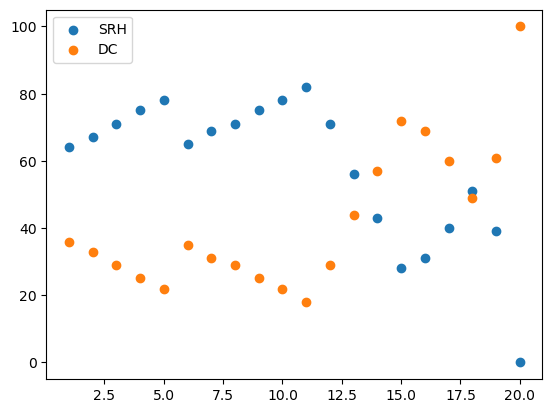

In [ ]:
plt.scatter(plot['index'], plot['SRH'], label='SRH')
plt.scatter(plot['index'], plot['DC'], label='DC')
plt.legend()

In [5]:
cities = dict()
for match in fixtures["results"]:
    cities[match["venue"]] = match["venue"].split(",")[-1].split(" ")[1]

In [6]:
cities

{'Narendra Modi Stadium, Ahmedabad (night)': 'Ahmedabad',
 'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh (day/night)': 'Chandigarh',
 'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow (night)': 'Lucknow',
 'Rajiv Gandhi International Stadium, Uppal, Hyderabad (day/night)': 'Hyderabad',
 'M Chinnaswamy Stadium, Bengaluru (night)': 'Bengaluru',
 'MA Chidambaram Stadium, Chepauk, Chennai (night)': 'Chennai',
 'Arun Jaitley Stadium, Delhi (night)': 'Delhi',
 'Barsapara Cricket Stadium, Guwahati (night)': 'Guwahati',
 'Eden Gardens, Kolkata (night)': 'Kolkata',
 'Barsapara Cricket Stadium, Guwahati (day/night)': 'Guwahati',
 'Wankhede Stadium, Mumbai (night)': 'Mumbai',
 'Narendra Modi Stadium, Ahmedabad (day/night)': 'Ahmedabad',
 'Rajiv Gandhi International Stadium, Uppal, Hyderabad (night)': 'Hyderabad',
 'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh (night)': 'Chandigarh',
 'M Chinnaswamy Stadium, Bengaluru (day/night)': 'Beng

In [ ]:
dataset_venues = {  'M Chinnaswamy Stadium': 'Bengaluru',
                    'Punjab Cricket Association Stadium, Mohali': 'Mohali',
                    'Arun Jaitley Cricket Stadium' : 'Delhi', 
                    'Wankhede Stadium' : 'Mumbai', 
                    'Eden Gardens' : 'Kolkata',
                    'Sawai Mansingh Stadium' : 'Jaipur',
                    'Rajiv Gandhi International Stadium, Uppal' : 'Hyderabad',
                    'MA Chidambaram Stadium, Chepauk' : 'Chennai', 
                    'Dr DY Patil Sports Academy' : 'Mumbai',
                    'Newlands' : 'Cape Town',
                    "St George's Park" : 'Port Elizabeth', 
                    'Kingsmead' : 'Durban', 
                    'SuperSport Park' : 'Centurion',
                    'Buffalo Park' : 'East London', 
                    'New Wanderers Stadium' : 'Johannesburg', 
                    'De Beers Diamond Oval' : 'Kimberley',
                    'OUTsurance Oval' : 'Bloemfontein', 
                    'Brabourne Stadium' : 'Mumbai',
                    'Sardar Patel Stadium, Motera' : 'Ahmedabad', 
                    'Barabati Stadium' : 'Cuttack',
                    'Vidarbha Cricket Association Stadium, Jamtha' : 'Nagpur',
                    'Himachal Pradesh Cricket Association Stadium' : 'Dharamsala',
                    'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium' : 'Visakhapatnam',
                    'Maharashtra Cricket Association Stadium' : 'Pune',
                    'Shaheed Veer Narayan Singh International Stadium' : 'Raipur',
                    'JSCA International Stadium Complex' : 'Ranchi', 
                    'Sheikh Zayed Stadium' : 'Abu Dhabi',
                    'Sharjah Cricket Stadium' : 'Sharjah', 
                    'Dubai International Cricket Stadium' : 'Dubai',
                    'Holkar Cricket Stadium' : 'Indore'}

In [ ]:
dataset_cities = set(dataset_venues.values())
dataset_cities

{'Abu Dhabi',
 'Ahmedabad',
 'Bengaluru',
 'Bloemfontein',
 'Cape Town',
 'Centurion',
 'Chennai',
 'Cuttack',
 'Delhi',
 'Dharamsala',
 'Dubai',
 'Durban',
 'East London',
 'Hyderabad',
 'Indore',
 'Jaipur',
 'Johannesburg',
 'Kimberley',
 'Kolkata',
 'Mohali',
 'Mumbai',
 'Nagpur',
 'Port Elizabeth',
 'Pune',
 'Raipur',
 'Ranchi',
 'Sharjah',
 'Visakhapatnam'}

In [ ]:
venues_to_drop = ['Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park', 'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval', 'OUTsurance Oval']

for venue in venues_to_drop:
    final_df = final_df[final_df['venue'] != venue]


NameError: name 'dataset_venues' is not defined

In [ ]:
City = [dataset_venues[venue] for venue in final_df['venue']]

In [ ]:
final_df['city'] = City

In [ ]:
final_df['city'].unique()

array(['Bengaluru', 'Mohali', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Ahmedabad', 'Cuttack', 'Nagpur',
       'Dharamsala', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', 'Sharjah', 'Dubai', 'Indore'], dtype=object)

In [ ]:
final_df = final_df[['batting_team','bowling_team','city','runs_to_bat','balls_left','wickets_left','target','crr','rrr','result']]